# Image Processing

### 1) Loading and displaying an image

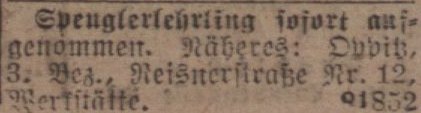

In [17]:
# Import from PIL
from PIL import Image
from IPython.display import display

# Set path to your image
image_path = 'Images/krz_19190525_013_38_job_offer.png'

# Open the image
image = Image.open(image_path)

# Show the image
display(image)

### 2) Image cropping and resizing

In [13]:
# Get image size (width, height)
print(image.size)

(421, 113)


In [18]:
# Crop the image
cropped_image = image.crop((25, 5, 260, 35))
display(cropped_image)

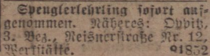

In [26]:
import numpy as np

half_width = int(np.round(image.size[0]/2))
half_height = int(np.round(image.size[1]/2))

# Resize the image
resized_image = image.resize((half_width, half_height))
display(resized_image)

### 5) Working with cv2

In [1]:
# Import OpenCV
import cv2

# Set path to your image
image_path = 'Images/krz_19190525_013_38_job_offer.png'

# Load the image
job_ad_image = cv2.imread(image_path)

# Show the image
cv2.imshow("Image", job_ad_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 6) Image Deskewing

In [3]:
from deskew import determine_skew 

book_image_path = 'Images/img_rotated.jpeg'
book_image = cv2.imread(book_image_path)
book_image = cv2.resize(book_image, (1000, 800))

cv2.imshow("Image", book_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
# Determine angle
angle = determine_skew(book_image)
print(angle)

# Use angle to deskew
height, width = book_image.shape[:2]
center = (width / 2, height / 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_img = cv2.warpAffine(book_image, rotation_matrix, (width, height))

# Display deskewed image
cv2.imshow("Image", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

-2.9999999999999916


### 7) Grayscale and Binarization

In [5]:
#Convert an image to grayscale
gray_image = cv2.cvtColor(book_image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale Image", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Binarization (thresholding)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary Image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 8) Noise Removal

In [8]:
# Apply median blur for noise removal
blurred_image = cv2.medianBlur(binary_image, 3)
cv2.imshow("No Noise", blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()